# Welcome to the money shot
**In this markdown we**
- graph projected SLR for 2030 to 2100
- make a dataframe called `slr_df` which contains the 17th, 50th, and 83rd quantile of SLR for each scenario for each decade 2030-2100
- make a dataframe called `slr_df_x` where `x` is the year for each decade from 2030-2100
- make a graph for proof of quantile concept

In [1]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Desktop/SLR-to-BI-4750`


In [2]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting
using DataFrames
# using Measures
# using MarkdownTables
using XLSX
using CSV
using Dates
using StatsModels
using GLM
using KernelDensity

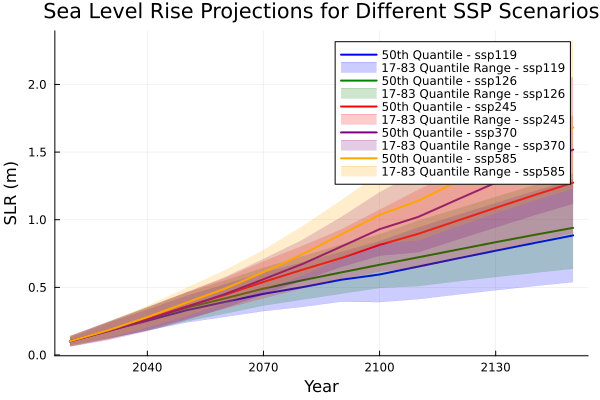

In [3]:
# get slr data
slr = DataFrame(XLSX.readtable("data/ipcc_ar6_sea_level_projection_psmsl_id_12.xlsx", "Total"))

# years range
years = 2020:10:2150

# unique scenarios
scenarios = ["ssp119", "ssp126", "ssp245", "ssp370", "ssp585"]

colors = [:blue, :green, :red, :purple, :orange]

# plotting
p = plot(xlabel="Year", ylabel="SLR (m)", title="Sea Level Rise Projections for Different SSP Scenarios")

# Loop through each scenario and plot the data
for (i, scenario) in enumerate(scenarios)
    # Filter data for 17th, 50th, and 83rd quantiles for the current scenario
    data_25 = filter(row -> row.scenario == scenario && row.quantile == 17, slr)
    data_50 = filter(row -> row.scenario == scenario && row.quantile == 50, slr)
    data_75 = filter(row -> row.scenario == scenario && row.quantile == 83, slr)

    # Extract the sea level data for the 17th, 50th, and 83rd quantiles
    sea_levels_25 = Vector{Float64}(data_25[1, Symbol.(string.(years))])
    sea_levels_50 = Vector{Float64}(data_50[1, Symbol.(string.(years))])
    sea_levels_75 = Vector{Float64}(data_75[1, Symbol.(string.(years))])

    # Plot the 50th quantile
    plot!(p, years, sea_levels_50, label="50th Quantile - $scenario", color=colors[i], lw=2)

    # Plot the shaded area between the 17th and 83rd quantiles
    plot!(p, years, sea_levels_25, fillrange=sea_levels_75, label="17-83 Quantile Range - $scenario", color=colors[i], lw=0, fillalpha=0.2)
end

# Display the plot
display(p)


In [4]:
years_all = []
scenarios_all = []
quantile_17_all = []
quantile_50_all = []
quantile_83_all = []

# Loop through each scenario and collect the data for each quantile
for scenario in scenarios
    data_25 = filter(row -> row.scenario == scenario && row.quantile == 17, slr)
    data_50 = filter(row -> row.scenario == scenario && row.quantile == 50, slr)
    data_75 = filter(row -> row.scenario == scenario && row.quantile == 83, slr)

    sea_levels_25 = Vector{Float64}(data_25[1, Symbol.(string.(years))])
    sea_levels_50 = Vector{Float64}(data_50[1, Symbol.(string.(years))])
    sea_levels_75 = Vector{Float64}(data_75[1, Symbol.(string.(years))])

    append!(years_all, years)
    append!(scenarios_all, fill(scenario, length(years)))
    append!(quantile_17_all, sea_levels_25)
    append!(quantile_50_all, sea_levels_50)
    append!(quantile_83_all, sea_levels_75)
end

# Create the DataFrame
slr_df = DataFrame(
    Year = years_all,
    Scenario = scenarios_all,
    Quantile_17 = quantile_17_all,
    Quantile_50 = quantile_50_all,
    Quantile_83 = quantile_83_all
)

println(slr_df)

70×5 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83 
     │ Any   Any       Any          Any          Any         
─────┼───────────────────────────────────────────────────────
   1 │ 2020  ssp119    0.074        0.1          0.13
   2 │ 2030  ssp119    0.126        0.18         0.241
   3 │ 2040  ssp119    0.181        0.253        0.336
   4 │ 2050  ssp119    0.24         0.33         0.437
   5 │ 2060  ssp119    0.282        0.392        0.524
   6 │ 2070  ssp119    0.325        0.452        0.61
   7 │ 2080  ssp119    0.356        0.501        0.685
   8 │ 2090  ssp119    0.394        0.556        0.763
   9 │ 2100  ssp119    0.391        0.595        0.843
  10 │ 2110  ssp119    0.413        0.654        0.944
  11 │ 2120  ssp119    0.447        0.713        1.035
  12 │ 2130  ssp119    0.479        0.771        1.124
  13 │ 2140  ssp119    0.51         0.828        1.213
  14 │ 2150  ssp119    0.539        0.884        1.301
  15 │ 2020  ssp126    0.065   

In [59]:
slr_2030_df = slr_df[slr_df.Year .== 2030, :]
slr_2040_df = slr_df[slr_df.Year .== 2040, :]
slr_2050_df = slr_df[slr_df.Year .== 2050, :]
slr_2060_df = slr_df[slr_df.Year .== 2060, :]
slr_2070_df = slr_df[slr_df.Year .== 2070, :]
slr_2080_df = slr_df[slr_df.Year .== 2080, :]
slr_2090_df = slr_df[slr_df.Year .== 2090, :]
slr_2100_df = slr_df[slr_df.Year .== 2100, :]

5×5 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83 
     │ Any   Any       Any          Any          Any         
─────┼───────────────────────────────────────────────────────
   1 │ 2100  ssp119    0.391        0.595        0.843
   2 │ 2100  ssp126    0.496        0.667        0.893
   3 │ 2100  ssp245    0.617        0.814        1.075
   4 │ 2100  ssp370    0.735        0.93         1.204
   5 │ 2100  ssp585    0.826        1.036        1.343

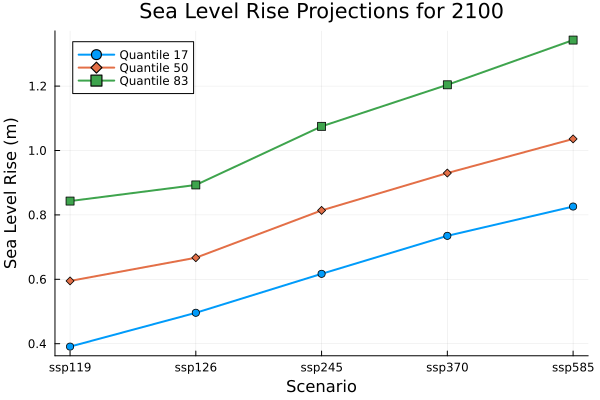

In [60]:
scenarios = slr_2030_df.Scenario
quantile_17 = slr_2100_df.Quantile_17
quantile_50 = slr_2100_df.Quantile_50
quantile_83 = slr_2100_df.Quantile_83

# Create the plot
plot(scenarios, quantile_17, label="Quantile 17", lw=2, marker=:circle)
plot!(scenarios, quantile_50, label="Quantile 50", lw=2, marker=:diamond)
plot!(scenarios, quantile_83, label="Quantile 83", lw=2, marker=:square)

# Add titles and labels
xlabel!("Scenario")
ylabel!("Sea Level Rise (m)")
title!("Sea Level Rise Projections for 2100")

# Now! We make distributions
**In this markdown we**
- add two rows to each df `slr_df_x`; one for mean and one for std in function `add_mean_std`
- make the mean and std a noraml distribution and then combine them in function `mix_distributions`
- apply for good, med, bad and equal

In [71]:
function add_mean_std(df::DataFrame, cols::Vector{Symbol})
    df.mean = [mean([row[c] for c in cols]) for row in eachrow(df)]
    df.std = [std([row[c] for c in cols]) for row in eachrow(df)]
    
    return df
end

function mix_distributions(df::DataFrame, weights::Vector{Float64})
    # Ensure the number of weights matches the number of rows in the DataFrame
    if length(weights) != nrow(df)
        error("Number of weights must match the number of rows in the DataFrame.")
    end
    
    means = df.mean
    stds = df.std
    
    # create a vector of Normal distributions
    distributions = [Normal(mean, std) for (mean, std) in zip(means, stds)]
    
    # mix the model
    mixture_model = MixtureModel(distributions, weights)
    
    return mixture_model
end


mix_distributions (generic function with 1 method)

In [72]:
slr_2030_df = add_mean_std(slr_2030_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2040_df = add_mean_std(slr_2040_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2050_df = add_mean_std(slr_2050_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2060_df = add_mean_std(slr_2060_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2070_df = add_mean_std(slr_2070_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2080_df = add_mean_std(slr_2080_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2090_df = add_mean_std(slr_2090_df, [:Quantile_17, :Quantile_50, :Quantile_83])

slr_2100_df = add_mean_std(slr_2100_df, [:Quantile_17, :Quantile_50, :Quantile_83])



5×7 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83  mean      std    ⋯
     │ Any   Any       Any          Any          Any          Float64   Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2100  ssp119    0.391        0.595        0.843        0.609667  0.2263 ⋯
   2 │ 2100  ssp126    0.496        0.667        0.893        0.685333  0.1991
   3 │ 2100  ssp245    0.617        0.814        1.075        0.835333  0.2297
   4 │ 2100  ssp370    0.735        0.93         1.204        0.956333  0.2356
   5 │ 2100  ssp585    0.826        1.036        1.343        1.06833   0.2600 ⋯
                                                                1 column omitted

In [73]:
# weights
weights_good = [3/5, 1/5, 0.5/5, 0.25/5, 0.25/5]
weights_med = [0.25/5, 0.75/5, 3/5, 0.75/5, 0.25/5]
weights_bad = [0.25/5, 0.25/5, 0.5/5, 1/5, 3/5]
weights_eq = [1/5, 1/5, 1/5, 1/5, 1/5]

5-element Vector{Float64}:
 0.2
 0.2
 0.2
 0.2
 0.2

In [74]:
# 2030 gmbe
# good
mixture_model_2030_good = mix_distributions(slr_2030_df, weights_good)
# medium
mixture_model_2030_med = mix_distributions(slr_2030_df, weights_med)
# bad
mixture_model_2030_bad = mix_distributions(slr_2030_df, weights_bad)
# weights_eq
mixture_model_2030_eq = mix_distributions(slr_2030_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.18233333333333332, σ=0.05753549628997157)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.18366666666666664, σ=0.06351640208114226)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.18166666666666664, σ=0.06351640208114226)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.17833333333333332, σ=0.06700994951000436)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.18600000000000003, σ=0.05702630971753301)


In [75]:
# 2040 gmbe
# good
mixture_model_2040_good = mix_distributions(slr_2040_df, weights_good)
# medium
mixture_model_2040_med = mix_distributions(slr_2040_df, weights_med)
# bad
mixture_model_2040_bad = mix_distributions(slr_2040_df, weights_bad)
# weights_eq
mixture_model_2040_eq = mix_distributions(slr_2040_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.25666666666666665, σ=0.07756502648316015)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.26766666666666666, σ=0.0865582655402321)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.26866666666666666, σ=0.08303212229814033)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.26266666666666666, σ=0.0870306459434453)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.2833333333333333, σ=0.07905272502155339)


In [76]:
# 2050 gmbe
# good
mixture_model_2050_good = mix_distributions(slr_2050_df, weights_good)
# medium
mixture_model_2050_med = mix_distributions(slr_2050_df, weights_med)
# bad
mixture_model_2050_bad = mix_distributions(slr_2050_df, weights_bad)
# weights_eq
mixture_model_2050_eq = mix_distributions(slr_2050_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.3356666666666667, σ=0.09862217465323574)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.353, σ=0.10558882516630252)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.3626666666666667, σ=0.09808329793259062)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.3586666666666667, σ=0.10208003396028695)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.39066666666666666, σ=0.10307925753192702)


In [77]:
# 2060 gmbe
# good
mixture_model_2060_good = mix_distributions(slr_2060_df, weights_good)
# medium
mixture_model_2060_med = mix_distributions(slr_2060_df, weights_med)
# bad
mixture_model_2060_bad = mix_distributions(slr_2060_df, weights_bad)
# weights_eq
mixture_model_2060_eq = mix_distributions(slr_2060_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.3993333333333333, σ=0.12116655204029426)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.425, σ=0.12264990827554666)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.4523333333333333, σ=0.11273124382057234)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.4583333333333333, σ=0.11372921055442761)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.49899999999999994, σ=0.122747708736253)


In [78]:
# 2070 gmbe
# good
mixture_model_2070_good = mix_distributions(slr_2070_df, weights_good)
# medium
mixture_model_2070_med = mix_distributions(slr_2070_df, weights_med)
# bad
mixture_model_2070_bad = mix_distributions(slr_2070_df, weights_bad)
# weights_eq
mixture_model_2070_eq = mix_distributions(slr_2070_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.4623333333333333, σ=0.14278071765239636)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.501, σ=0.1402676013910554)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.551, σ=0.1368320137979413)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.5726666666666667, σ=0.13245502381311677)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.625, σ=0.1459349170006959)


In [79]:
# 2080 gmbe
# good
mixture_model_2080_good = mix_distributions(slr_2080_df, weights_good)
# medium
mixture_model_2080_med = mix_distributions(slr_2080_df, weights_med)
# bad
mixture_model_2080_bad = mix_distributions(slr_2080_df, weights_bad)
# weights_eq
mixture_model_2080_eq = mix_distributions(slr_2080_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.514, σ=0.1648848082753533)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.564, σ=0.16033714479184166)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.6433333333333334, σ=0.15742405576446486)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.691, σ=0.1513968295572929)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.7613333333333333, σ=0.18261799838278078)


In [80]:
# 2090 gmbe
# good
mixture_model_2090_good = mix_distributions(slr_2090_df, weights_good)
# medium
mixture_model_2090_med = mix_distributions(slr_2090_df, weights_med)
# bad
mixture_model_2090_bad = mix_distributions(slr_2090_df, weights_bad)
# weights_eq
mixture_model_2090_eq = mix_distributions(slr_2090_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.5710000000000001, σ=0.18495675170158024)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.6263333333333333, σ=0.18205035933316177)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.7356666666666666, σ=0.1832930258720537)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.8233333333333333, σ=0.18510627578051836)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.915, σ=0.2165848563496534)


In [81]:
# 2100 gmbe
# good
mixture_model_2100_good = mix_distributions(slr_2100_df, weights_good)
# medium
mixture_model_2100_med = mix_distributions(slr_2100_df, weights_med)
# bad
mixture_model_2100_bad = mix_distributions(slr_2100_df, weights_bad)
# weights_eq
mixture_model_2100_eq = mix_distributions(slr_2100_df, weights_eq)

MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.6096666666666667, σ=0.22635665073801856)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.6853333333333333, σ=0.19913395826260608)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.8353333333333334, σ=0.22974406049631257)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.9563333333333333, σ=0.23560631004566351)
components[5] (prior = 0.2000): Normal{Float64}(μ=1.0683333333333334, σ=0.2600121792019238)


# Okay. Now we will sample from the distributions and get our expected exceedence depending on our outlook on life and which year we are protecting against
- first we will sample from mixture_model_2030_good to demonstrate the idea and append it to our historical data
- calculate exceedence on 90th

In [82]:
good_2030_samples = rand(mixture_model_2030_good, 1000)

1000-element Vector{Float64}:
 0.11606079176707992
 0.13781662957739374
 0.18240184735164827
 0.17836472963958763
 0.11695199992546884
 0.24351124027142568
 0.18673898847645226
 0.22581870979606244
 0.1783992553115692
 0.2100246918128759
 ⋮
 0.24573401070922074
 0.17474408060386723
 0.166163254710422
 0.2410221050881025
 0.16723999820945237
 0.14130916476900246
 0.2320632078813234
 0.21121734084954438
 0.16664953885705586

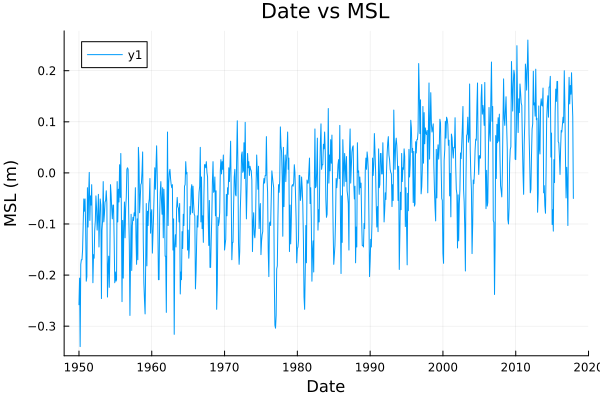

In [93]:
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

history.Date = Date.(history.Date, "yyyy/mm/dd")  
rename!(history, Symbol("MSL (m)") => :MSL)
plot(history.Date, history."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))


In [ ]:
history_simple = select(history, :Date, :("MSL"))

817×2 DataFrame
 Row │ Date        MSL       
     │ Date        Float64   
─────┼───────────────────────
   1 │ 1950-01-01  -0.258
   2 │ 1950-02-01  -0.206
   3 │ 1950-03-01  -0.34
   4 │ 1950-04-01  -0.179
   5 │ 1950-05-01  -0.17
   6 │ 1950-06-01  -0.17
   7 │ 1950-07-01  -0.151
   8 │ 1950-08-01  -0.099
   9 │ 1950-09-01  -0.051
  10 │ 1950-10-01  -0.075
  11 │ 1950-11-01  -0.051
  12 │ 1950-12-01  -0.103
  13 │ 1951-01-01  -0.212
  14 │ 1951-02-01  -0.203
  15 │ 1951-03-01  -0.029
  16 │ 1951-04-01  -0.106
  17 │ 1951-05-01  -0.042
  18 │ 1951-06-01   0.001
  19 │ 1951-07-01  -0.093
  20 │ 1951-08-01  -0.045
  21 │ 1951-09-01  -0.063
  22 │ 1951-10-01  -0.023
  23 │ 1951-11-01  -0.121
  24 │ 1951-12-01  -0.215
  25 │ 1952-01-01  -0.16
  26 │ 1952-02-01  -0.167
  27 │ 1952-03-01  -0.112
  28 │ 1952-04-01  -0.093
  29 │ 1952-05-01  -0.045
  30 │ 1952-06-01  -0.069
  31 │ 1952-07-01  -0.112
  32 │ 1952-08-01  -0.087
  33 │ 1952-09-01  -0.042
  34 │ 1952-10-01  -0.145
  35 │ 1952-11

In [ ]:
new_row_2030_good = (Date = Date("2030-01-01"), MSL = mean(good_2030_samples))
push!(history_simple, new_row_2030_good)

In [102]:
# try some exceedence stuff
function exceedance_threshold(data)
    return quantile(data, 0.9)
end


exceedance_threshold (generic function with 1 method)

In [ ]:
msl_data = history.MSL  
threshold = exceedance_threshold(msl_data)
println("Exceedance Threshold (90th percentile): ", threshold)

## Should I convert historical data to be per decade? this is this last

In [ ]:
# look I added 2030 data
plot(history_simple.Date, history_simple."MSL", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))

In [28]:
distributions = []

for row in eachrow(slr_2030_df)
    μ = row.Quantile_50
    σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
    push!(distributions, Normal(μ, σ))
end


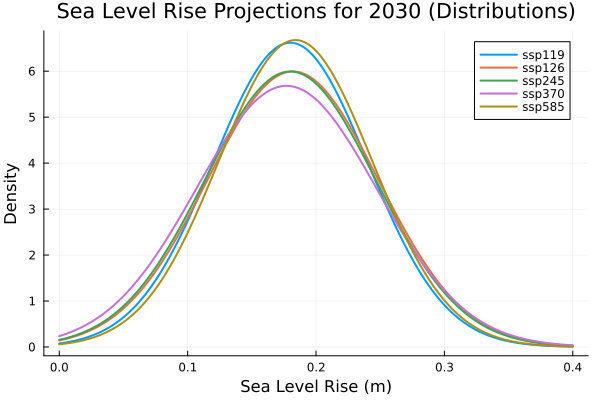

In [29]:

x = 0:0.001:0.4  # Range of x values (sea level rise in meters)
plot(x, pdf.(distributions[1], x), label=slr_2030_df.Scenario[1], lw=2)
for i in 2:length(distributions)
    plot!(x, pdf.(distributions[i], x), label=slr_2030_df.Scenario[i], lw=2)
end

# Add titles and labels
xlabel!("Sea Level Rise (m)")
ylabel!("Density")
title!("Sea Level Rise Projections for 2030 (Distributions)")


In [45]:
slr_2100_df = slr_df[slr_df.Year .== 2100, :]
# Calculate mean and standard deviation for each row
slr_2100_df.mean = [mean([row.Quantile_17, row.Quantile_50, row.Quantile_83]) for row in eachrow(slr_2100_df)]
slr_2100_df.std = [std([row.Quantile_17, row.Quantile_50, row.Quantile_83]) for row in eachrow(slr_2100_df)]

# Display the updated DataFrame
println(slr_2100_df)


5×7 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83  mean      std      
     │ Any   Any       Any          Any          Any          Float64   Float64  
─────┼───────────────────────────────────────────────────────────────────────────
   1 │ 2100  ssp119    0.391        0.595        0.843        0.609667  0.226357
   2 │ 2100  ssp126    0.496        0.667        0.893        0.685333  0.199134
   3 │ 2100  ssp245    0.617        0.814        1.075        0.835333  0.229744
   4 │ 2100  ssp370    0.735        0.93         1.204        0.956333  0.235606
   5 │ 2100  ssp585    0.826        1.036        1.343        1.06833   0.260012


In [32]:
# Calculate mean and standard deviation for each row
slr_2030_df.mean = [mean([row.Quantile_17, row.Quantile_50, row.Quantile_83]) for row in eachrow(slr_2030_df)]
slr_2030_df.std = [std([row.Quantile_17, row.Quantile_50, row.Quantile_83]) for row in eachrow(slr_2030_df)]

# Display the updated DataFrame
println(slr_2030_df)


5×7 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83  mean      std       
     │ Any   Any       Any          Any          Any          Float64   Float64   
─────┼────────────────────────────────────────────────────────────────────────────
   1 │ 2030  ssp119    0.126        0.18         0.241        0.182333  0.0575355
   2 │ 2030  ssp126    0.121        0.182        0.248        0.183667  0.0635164
   3 │ 2030  ssp245    0.119        0.18         0.246        0.181667  0.0635164
   4 │ 2030  ssp370    0.112        0.177        0.246        0.178333  0.0670099
   5 │ 2030  ssp585    0.13         0.184        0.244        0.186     0.0570263


In [ ]:

# Define the individual distributions and weights THIS IS 2100
distributions = [
    Normal(0.609667,  0.226357), 
    Normal(0.685333,  0.199134), 
    Normal(0.835333,  0.229744), 
    Normal(0.956333,  0.235606), 
    Normal(1.06833,   0.260012)
]
weights = [3/5, 1/5, 1/5, 0/5, 0/5]  # Equal weights for all scenarios

# Create the mixture model
mixture_dist_2100_good = MixtureModel(distributions, weights)



MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.6000): Normal{Float64}(μ=0.609667, σ=0.226357)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.685333, σ=0.199134)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.835333, σ=0.229744)
components[4] (prior = 0.0000): Normal{Float64}(μ=0.956333, σ=0.235606)
components[5] (prior = 0.0000): Normal{Float64}(μ=1.06833, σ=0.260012)


In [64]:
using DataFrames
using Distributions

function mix_distributions(df::DataFrame, weights::Vector{Float64})
    # Ensure the number of weights matches the number of rows in the DataFrame
    if length(weights) != nrow(df)
        error("Number of weights must match the number of rows in the DataFrame.")
    end
    
    # Extract mean and std from the DataFrame
    means = df.mean
    stds = df.std
    
    # Create a vector of Normal distributions
    distributions = [Normal(mean, std) for (mean, std) in zip(means, stds)]
    
    # Create the mixture model
    mixture_model = MixtureModel(distributions, weights)
    
    return mixture_model
end

# Example usage
slr_2030_df = DataFrame(
    Year = [2030, 2030, 2030, 2030, 2030],
    Scenario = ["ssp119", "ssp126", "ssp245", "ssp370", "ssp585"],
    Quantile_17 = [0.126, 0.121, 0.119, 0.112, 0.13],
    Quantile_50 = [0.18, 0.182, 0.18, 0.177, 0.184],
    Quantile_83 = [0.241, 0.248, 0.246, 0.246, 0.244],
    mean = [0.182333, 0.183667, 0.181667, 0.178333, 0.186],
    std = [0.0575355, 0.0635164, 0.0635164, 0.0670099, 0.0570263]
)

weights = [3/5, 1/5, 1/5, 0/5, 0/5]
mixture_model = mix_distributions(slr_2030_df, weights)
println(mixture_model)


MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.6000): Normal{Float64}(μ=0.182333, σ=0.0575355)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.183667, σ=0.0635164)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.181667, σ=0.0635164)
components[4] (prior = 0.0000): Normal{Float64}(μ=0.178333, σ=0.0670099)
components[5] (prior = 0.0000): Normal{Float64}(μ=0.186, σ=0.0570263)



In [52]:

# Define the individual distributions and weights THIS IS 2100
distributions = [
    Normal(0.609667,  0.226357), 
    Normal(0.685333,  0.199134), 
    Normal(0.835333,  0.229744), 
    Normal(0.956333,  0.235606), 
    Normal(1.06833,   0.260012)
]
weights = [0/5, 0/5, 1/5, 1/5, 3/5]  # Equal weights for all scenarios

# Create the mixture model
mixture_dist_2100_bad = MixtureModel(distributions, weights)



MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.0000): Normal{Float64}(μ=0.609667, σ=0.226357)
components[2] (prior = 0.0000): Normal{Float64}(μ=0.685333, σ=0.199134)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.835333, σ=0.229744)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.956333, σ=0.235606)
components[5] (prior = 0.6000): Normal{Float64}(μ=1.06833, σ=0.260012)


In [ ]:
# Define the individual distributions and weights THIS IS 2030
distributions = [
    Normal(0.182333, 0.0575355), 
    Normal(0.183667, 0.0635164), 
    Normal(0.181667, 0.0635164), 
    Normal(0.178333, 0.0670099), 
    Normal(0.186, 0.0570263)
]
weights = [3/5, 1/5, 1/5, 0/5, 0/5]  # Equal weights for all scenarios

# Create the mixture model
mixture_dist = MixtureModel(distributions, weights)



MixtureModel{Normal{Float64}}(K = 5)
components[1] (prior = 0.2000): Normal{Float64}(μ=0.182333, σ=0.0575355)
components[2] (prior = 0.2000): Normal{Float64}(μ=0.183667, σ=0.0635164)
components[3] (prior = 0.2000): Normal{Float64}(μ=0.181667, σ=0.0635164)
components[4] (prior = 0.2000): Normal{Float64}(μ=0.178333, σ=0.0670099)
components[5] (prior = 0.2000): Normal{Float64}(μ=0.186, σ=0.0570263)


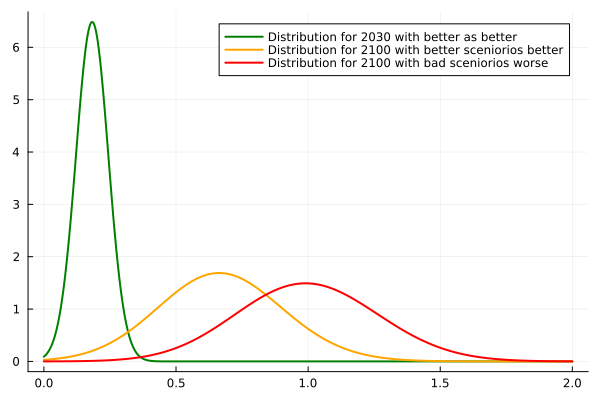

In [58]:
x = 0:0.001:2  # Range of sea level rise in meters
plot(x, pdf.(mixture_dist, x), label="Distribution for 2030 with better as better", lw=2, color=:green)
plot!(x, pdf.(mixture_dist_2100_good, x), label="Distribution for 2100 with better sceniorios better", lw=2, color=:orange)
plot!(x, pdf.(mixture_dist_2100_bad, x), label="Distribution for 2100 with bad sceniorios worse", lw=2, color=:red)

In [22]:
using Plots
using Distributions

# Plot settings
plot_title = "First 5 Sea Level Rise Distributions"
x_range = range(-5, 5; length=1000) # Adjust this range based on expected sea level values
colors = [:blue, :green, :red, :orange, :purple] # Colors for the distributions

# Plot each distribution
plt = plot(title=plot_title, xlabel="Sea Level Rise (meters)", ylabel="Density")
for (i, dist) in enumerate(distributions[1:5])
    y_vals = pdf.(dist, x_range) # Calculate the PDF values
    print(y_vals)
    plot!(x_range, y_vals, label="Distribution $i", color=colors[i])
end

# Show the plot
display(plt)


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [7]:
Random.seed!(1)

TaskLocalRNG()

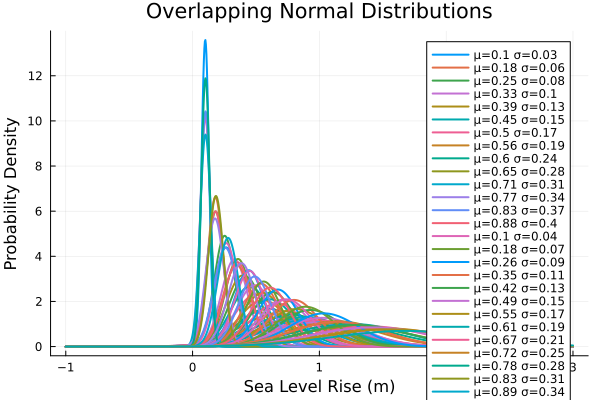

In [8]:
# chat does all of them idk
using Plots
using Distributions

# Create a plot object
p = plot(title="Overlapping Normal Distributions", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

# Define a range for the x-axis
x = range(-1, 3, length=1000)  # Adjust based on expected sea level range

# Loop through distributions and plot their PDFs
for dist in distributions
    # Compute PDF values for each x point
    pdf_values = [Distributions.pdf(dist, xi) for xi in x]
    # Plot the PDF
    plot!(p, x, pdf_values, lw=2, label="μ=$(round(mean(dist), digits=2)) σ=$(round(std(dist), digits=2))")
end

# Display the plot
display(p)


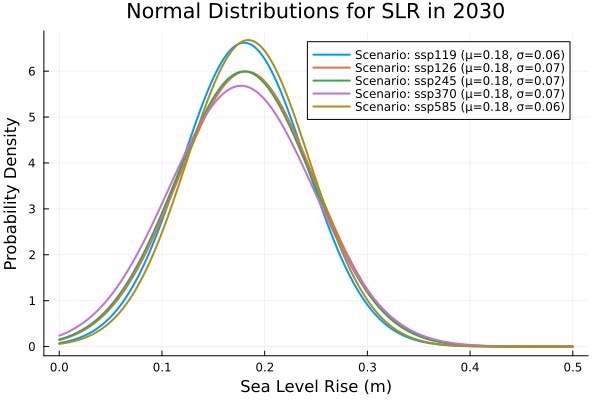

In [9]:
# try year 2030
slr_df_2030 = filter(row -> row.Year == 2030, slr_df)

distributions_2030 = []
for row in eachrow(slr_df_2030)
    μ = row.Quantile_50
    σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
    push!(distributions_2030, Normal(μ, σ))
end


p = plot(title="Normal Distributions for SLR in 2030", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

x = range(0.0, 0.5, length=1000) 


for (i, dist) in enumerate(distributions_2030)
    pdf_values = [Distributions.pdf(dist, xi) for xi in x]
    scenario = slr_df_2030[i, :Scenario]  # Get scenario label
    plot!(p, x, pdf_values, lw=2, label="Scenario: $scenario (μ=$(round(mean(dist), digits=2)), σ=$(round(std(dist), digits=2)))")
end

display(p)


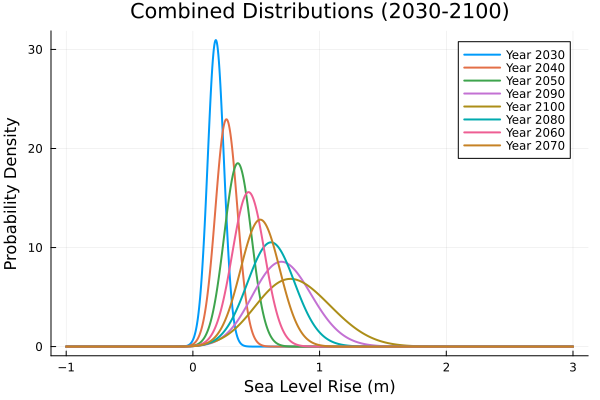

In [10]:
# here edit weights per scenario
weights = Dict("ssp119" => 1.0, "ssp126" => 1.0, "ssp245" => 1.0, "ssp370" => 1.0, "ssp585" => 1.0)

years = 2030:10:2100

x = range(-1, 3, length=1000) 

combined_distributions = Dict()

for year in years
    slr_df_year = filter(row -> row.Year == year, slr_df)

    combined_pdf = zeros(length(x))
    for row in eachrow(slr_df_year)
        scenario = row.Scenario
        μ = row.Quantile_50
        σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
        dist = Normal(μ, σ)

        combined_pdf .+= weights[scenario] * [Distributions.pdf(dist, xi) for xi in x]
    end

    # combined_pdf ./= sum(combined_pdf) * (x[2] - x[1]) # normalizing pdf

    combined_distributions[year] = combined_pdf
end

p = plot(title="Combined Distributions (2030-2100)", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

for (year, pdf) in combined_distributions
    plot!(p, x, pdf, lw=2, label="Year $year")
end

display(p)


In [19]:
# trying something else
# println(maximum(combined_distributions[2030]))
some = rand(combined_distributions[2100], 1000)
println(mean(some))

1.1477282053200382


# let me here try to sample to build out MSL over time

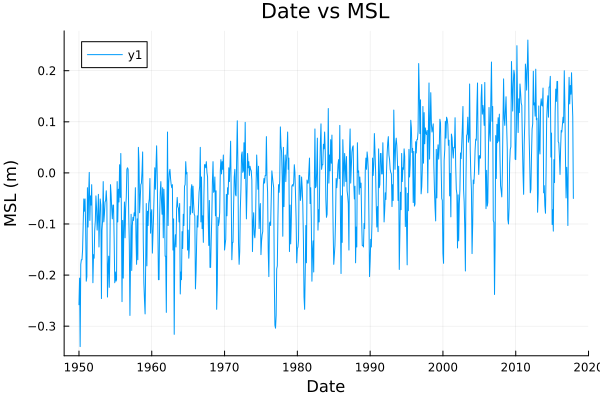

In [159]:
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

history.Date = Date.(history.Date, "yyyy/mm/dd")  

plot(history.Date, history."MSL (m)", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))


In [160]:

Random.seed!(1)

simulations = 1000
expected_values = []

# Loop through each year and its distribution
for (year, pdf) in combined_distributions
    yearly_expected_values = []
    
    for i in 1:simulations
        # Get the PDF for the year
        slr_dist = Normal(pdf[1], pdf[2])  
        
        # Sample a value from the distribution
        slr_sample = rand(slr_dist)
        push!(yearly_expected_values, slr_sample)
    end
    
    # Store the average (expected value) of the simulations
    push!(expected_values, mean(yearly_expected_values))
end

# Combine the results with the years from `slr_df`
expected_slr_df = DataFrame(Year = years, MSL = expected_values)

# Display the final DataFrame
println(expected_slr_df)


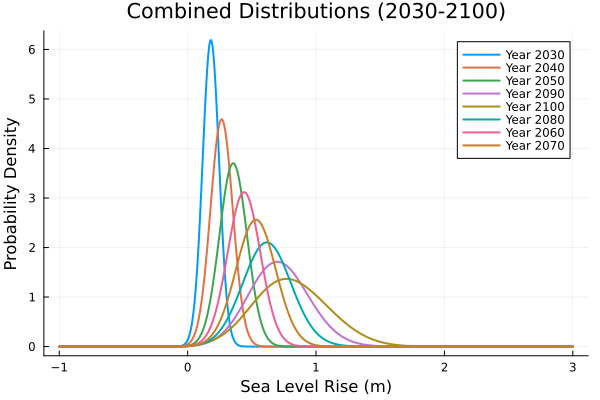

In [161]:
Random.seed!(1)

# Weights for each scenario
weights = Dict("ssp119" => 1.0, "ssp126" => 1.0, "ssp245" => 1.0, "ssp370" => 1.0, "ssp585" => 1.0)

years = 2030:10:2100

x = range(-1, 3, length=1000) 

combined_distributions = Dict()

# Generate combined PDFs for each year
for year in years
    slr_df_year = filter(row -> row.Year == year, slr_df)

    combined_pdf = zeros(length(x))
    
    for row in eachrow(slr_df_year)
        scenario = row.Scenario
        μ = row.Quantile_50
        σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
        dist = Normal(μ, σ)

        # Calculate the PDF for this distribution at all x points
        pdf_values = [Distributions.pdf(dist, xi) for xi in x]
        
        # Normalize the individual PDF (so that it sums to 1)
        pdf_values ./= sum(pdf_values) * (x[2] - x[1])
        
        # Apply the weight and add to the combined PDF
        combined_pdf .+= weights[scenario] * pdf_values
    end
    
    # Normalize the combined PDF for the year
    combined_pdf ./= sum(combined_pdf) * (x[2] - x[1])  # Normalize to ensure total sum is 1

    combined_distributions[year] = combined_pdf
end

# Plot the combined distributions
p = plot(title="Combined Distributions (2030-2100)", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

for (year, pdf) in combined_distributions
    plot!(p, x, pdf, lw=2, label="Year $year")
end

display(p)


**nothing is working from here below**

In [162]:

# Now, simulate the sea level rise for each year (Monte Carlo simulation)
simulations = 1000
expected_values = []

for (year, pdf) in combined_distributions
    yearly_expected_values = []
    
    for i in 1:simulations
        # Get the PDF for the year
        slr_dist = Normal(pdf[1], pdf[2])  
        
        # Sample a value from the distribution
        slr_sample = rand(slr_dist)
        push!(yearly_expected_values, slr_sample)
    end
    
    # Store the average (expected value) of the simulations
    push!(expected_values, mean(yearly_expected_values))
end

# Combine the results with the years from `slr_df`
expected_slr_df = DataFrame(Year = years, MSL = expected_values)

# Display the final DataFrame
println(expected_slr_df)
